In [1]:
pip install -U scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# Antecendent hold universe variables
age = ctrl.Antecedent(np.arange(0, 71, 1), 'age')
BS = ctrl.Antecedent(np.arange(0, 20, 1), 'BS')
systolicBP = ctrl.Antecedent(np.arange(0, 161 ,1), 'systolicBP')
diastolicBP = ctrl.Antecedent(np.arange(0,101,1), 'diastolicBP')

# Consequent hold universe variables
riskLevel = ctrl.Consequent(np.arange(0, 11, 1), 'riskLevel')


C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyv

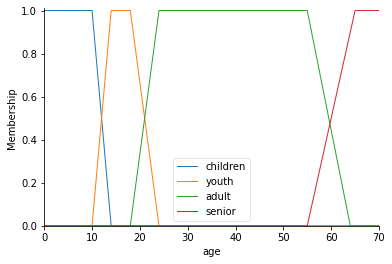

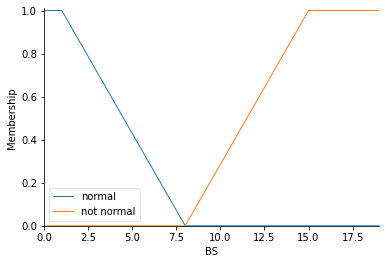

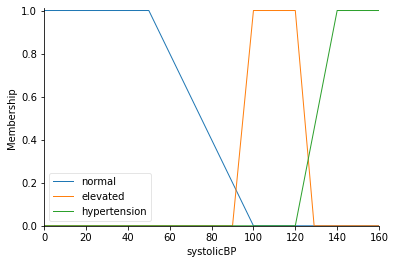

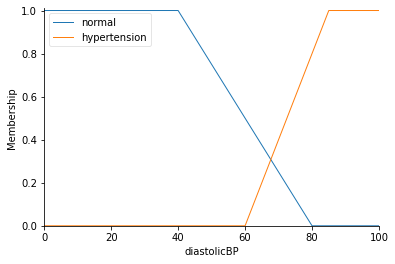

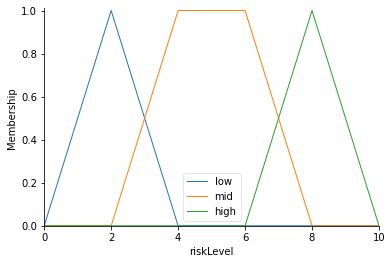

In [3]:
# Custom Membership Function for age variables
age['children'] = fuzz.trapmf(age.universe, [0, 0, 10, 14])
age['youth'] = fuzz.trapmf(age.universe, [10,14,18,24])
age['adult'] = fuzz.trapmf(age.universe,[18,24,55,64])
age['senior'] = fuzz.trapmf(age.universe,[55,65,70,100])

# Custom Membership Function for BS (Blood Sugar) variables
BS['normal'] = fuzz.trapmf(BS.universe, [0,0,1,8])
BS['not normal'] = fuzz.trapmf(BS.universe, [8,15,19,19])

# Custom Membership Function for systolicBP (upper blood pressure) variables
systolicBP['normal'] = fuzz.trapmf(systolicBP.universe, [0,0,50,100])
systolicBP['elevated'] = fuzz.trapmf(systolicBP.universe, [90,100,120,129])
systolicBP['hypertension'] = fuzz.trapmf(systolicBP.universe, [120,140,161,161])

# Custom Membership Function for diastolicBP (lower blood pressure) variables
diastolicBP['normal'] = fuzz.trapmf(diastolicBP.universe, [0,0,40,80])
diastolicBP['hypertension'] = fuzz.trapmf(diastolicBP.universe, [60,85,100,161])

# Custom membership functions for riskLevel (maternal health risk)
riskLevel['low'] = fuzz.trimf(riskLevel.universe, [0,2,4])
riskLevel['mid'] = fuzz.trapmf(riskLevel.universe, [2,4,6,8])
riskLevel['high'] = fuzz.trimf(riskLevel.universe, [6,8,10])

# View membership function graph
age.view()
BS.view()
systolicBP.view()
diastolicBP.view()
riskLevel.view()

In [4]:
# Fuzzy Logic Rules
#low risk rules
rule1 = ctrl.Rule(age['children'] & BS['normal'] & systolicBP['normal'] & diastolicBP['normal'] , riskLevel['low'])
rule2 = ctrl.Rule(age['youth'] & BS['normal'] & systolicBP['normal'] & diastolicBP['normal'] , riskLevel['low'])
rule3 = ctrl.Rule(age['adult'] & BS['normal'] & systolicBP['normal'] & diastolicBP['normal'] , riskLevel['low'])
rule4 = ctrl.Rule(age['senior'] & BS['normal'] & systolicBP['normal'] & diastolicBP['normal'] , riskLevel['low'])

rule5 = ctrl.Rule(age['youth'] & BS['normal'] & systolicBP['elevated'] & diastolicBP['normal'] , riskLevel['low'])
rule6 = ctrl.Rule(age['adult'] & BS['normal'] & systolicBP['elevated'] & diastolicBP['normal'] , riskLevel['low'])

rule7 = ctrl.Rule(age['children'] & BS['normal'] & systolicBP['elevated'] & diastolicBP['hypertension'] , riskLevel['low'])
rule8 = ctrl.Rule(age['youth'] & BS['normal'] & systolicBP['elevated'] & diastolicBP['hypertension'] , riskLevel['low'])
rule9 = ctrl.Rule(age['senior'] & BS['normal'] & systolicBP['elevated'] & diastolicBP['hypertension'] , riskLevel['low'])

#mid risk rules
rule10 = ctrl.Rule(age['children'] & BS['normal'] & systolicBP['normal'] & diastolicBP['hypertension'] , riskLevel['mid'])
rule11 = ctrl.Rule(age['youth'] & BS['normal'] & systolicBP['normal'] & diastolicBP['hypertension'] , riskLevel['mid'])
rule12 = ctrl.Rule(age['adult'] & BS['normal'] & systolicBP['normal'] & diastolicBP['hypertension'] , riskLevel['mid'])
rule13 = ctrl.Rule(age['senior'] & BS['normal'] & systolicBP['normal'] & diastolicBP['hypertension'] , riskLevel['mid'])

rule14 = ctrl.Rule(age['adult'] & BS['normal'] & systolicBP['elevated'] & diastolicBP['hypertension'] , riskLevel['mid'])

rule15 = ctrl.Rule(age['youth'] & BS['normal'] & systolicBP['elevated'] & diastolicBP['normal'] , riskLevel['mid'])
rule16 = ctrl.Rule(age['senior'] & BS['normal'] & systolicBP['elevated'] & diastolicBP['normal'] , riskLevel['mid'])

rule17 = ctrl.Rule(age['children'] & BS['normal'] & systolicBP['hypertension'] & diastolicBP['normal'] , riskLevel['mid'])
rule18 = ctrl.Rule(age['youth'] & BS['normal'] & systolicBP['hypertension'] & diastolicBP['normal'] , riskLevel['mid'])
rule19 = ctrl.Rule(age['adult'] & BS['normal'] & systolicBP['hypertension'] & diastolicBP['normal'] , riskLevel['mid'])
rule20 = ctrl.Rule(age['senior'] & BS['normal'] & systolicBP['hypertension'] & diastolicBP['normal'] , riskLevel['mid'])

#high risk rules
rule21 = ctrl.Rule(age['children'] & BS['normal'] & systolicBP['hypertension'] & diastolicBP['hypertension'] , riskLevel['high'])
rule22 = ctrl.Rule(age['youth'] & BS['normal'] & systolicBP['hypertension'] & diastolicBP['hypertension'] , riskLevel['high'])
rule23 = ctrl.Rule(age['adult'] & BS['normal'] & systolicBP['hypertension'] & diastolicBP['hypertension'] , riskLevel['high'])
rule24 = ctrl.Rule(age['senior'] & BS['normal'] & systolicBP['hypertension'] & diastolicBP['hypertension'] , riskLevel['high'])

rule25 = ctrl.Rule(age['children'] & BS['not normal'] & systolicBP['normal'] & diastolicBP['normal'] , riskLevel['high'])
rule26 = ctrl.Rule(age['youth'] & BS['not normal'] & systolicBP['normal'] & diastolicBP['normal'] , riskLevel['high'])
rule27 = ctrl.Rule(age['adult'] & BS['not normal'] & systolicBP['normal'] & diastolicBP['normal'] , riskLevel['high'])
rule28 = ctrl.Rule(age['senior'] & BS['not normal'] & systolicBP['normal'] & diastolicBP['normal'] , riskLevel['high'])

rule29 = ctrl.Rule(age['children'] & BS['not normal'] & systolicBP['normal'] & diastolicBP['hypertension'] , riskLevel['high'])
rule30 = ctrl.Rule(age['youth'] & BS['not normal'] & systolicBP['normal'] & diastolicBP['hypertension'] , riskLevel['high'])
rule31 = ctrl.Rule(age['adult'] & BS['not normal'] & systolicBP['normal'] & diastolicBP['hypertension'] , riskLevel['high'])
rule32 = ctrl.Rule(age['senior'] & BS['not normal'] & systolicBP['normal'] & diastolicBP['hypertension'] , riskLevel['high'])

rule33 = ctrl.Rule(age['children'] & BS['not normal'] & systolicBP['elevated'] & diastolicBP['normal'] , riskLevel['high'])
rule34 = ctrl.Rule(age['youth'] & BS['not normal'] & systolicBP['elevated'] & diastolicBP['normal'] , riskLevel['high'])
rule35 = ctrl.Rule(age['adult'] & BS['not normal'] & systolicBP['elevated'] & diastolicBP['normal'] , riskLevel['high'])
rule36 = ctrl.Rule(age['senior'] & BS['not normal'] & systolicBP['elevated'] & diastolicBP['normal'] , riskLevel['high'])

rule37 = ctrl.Rule(age['children'] & BS['not normal'] & systolicBP['elevated'] & diastolicBP['hypertension'] , riskLevel['high'])
rule38 = ctrl.Rule(age['youth'] & BS['not normal'] & systolicBP['elevated'] & diastolicBP['hypertension'] , riskLevel['high'])
rule39 = ctrl.Rule(age['adult'] & BS['not normal'] & systolicBP['elevated'] & diastolicBP['hypertension'] , riskLevel['high'])
rule40 = ctrl.Rule(age['senior'] & BS['not normal'] & systolicBP['elevated'] & diastolicBP['hypertension'] , riskLevel['high'])

rule41 = ctrl.Rule(age['children'] & BS['not normal'] & systolicBP['hypertension'] & diastolicBP['normal'] , riskLevel['high'])
rule42 = ctrl.Rule(age['youth'] & BS['not normal'] & systolicBP['hypertension'] & diastolicBP['normal'] , riskLevel['high'])
rule43 = ctrl.Rule(age['adult'] & BS['not normal'] & systolicBP['hypertension'] & diastolicBP['normal'] , riskLevel['high'])
rule44 = ctrl.Rule(age['senior'] & BS['not normal'] & systolicBP['hypertension'] & diastolicBP['normal'] , riskLevel['high'])

rule45 = ctrl.Rule(age['children'] & BS['not normal'] & systolicBP['hypertension'] & diastolicBP['hypertension'] , riskLevel['high'])
rule46 = ctrl.Rule(age['youth'] & BS['not normal'] & systolicBP['hypertension'] & diastolicBP['hypertension'] , riskLevel['high'])
rule47 = ctrl.Rule(age['adult'] & BS['not normal'] & systolicBP['hypertension'] & diastolicBP['hypertension'] , riskLevel['high'])
rule48 = ctrl.Rule(age['senior'] & BS['not normal'] & systolicBP['hypertension'] & diastolicBP['hypertension'] , riskLevel['high'])

# Create control system
risk_ctrl = ctrl.ControlSystem(
    [rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,
     rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,
     rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,
     rule30,rule31,rule32,rule33,rule34,rule35,rule36,rule37,rule38,rule39,
     rule40,rule41,rule42,rule43,rule44,rule45,rule46,rule47,rule48])

risk = ctrl.ControlSystemSimulation(risk_ctrl)

8.000000000000002


C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


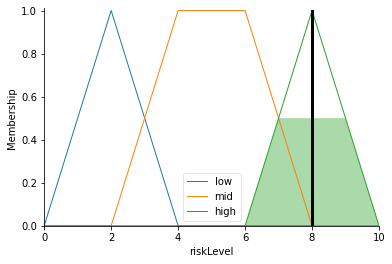

In [6]:
# Pass inputs to the ControlSystem
risk.input['age'] = 25
risk.input['BS'] = 15
risk.input['systolicBP'] = 130
risk.input['diastolicBP'] = 80

risk.compute()
print(risk.output['riskLevel'])
riskLevel.view(sim=risk)